**Project Proposal DSCI 100 Group 11** 

**Are UBC Students Stressed Out?**

In [12]:
library(tidyverse)
library(dbplyr)
library(DBI)
library(purrr)
library(tidymodels)
set.seed(12345)

**INTRODUCTION**

High stress levels among students can lead to a cascade of negative impacts. Students that are going through the most critical period in life will frequently face a lot of pressure in encountering many stressful events. A public dataset reveals five key factors influencing a student's stress level:

- Psychological factors: anxiety level, self esteem, mental health history, depression.
- Physiological factors: headache, blood pressure, sleep quality, breathing problems.
- Environmental factors: noise level, living conditions, safety, basic needs.
- Academic factors: academic performance, study load, teacher-student relationship, future career concerns.
- Social factors: social support, peer pressure, extracurricular activities, bullying.

Each factor is represented as a vector with values indicating intensity. The stress level is quantified on a scale of 0 to 2 (0: "Carefree", 1: "Intermediate", 2: "Stressful").

The main question of interest is: **How do academic and social factors impact a student's stress level?** Specifically, we aim to identify which factors exert the most significant influence, to what extent, and with what level of confidence.

This study will primarily focus on the interplay between academic and social factors and their correlation with stress levels. To achieve this, we will utilize a Student Stress dataset.

In [13]:
url <- "https://raw.githubusercontent.com/Ivvvyyan/dsci-group-11/main/StressLevelDataset.csv"
stress <- read_csv(url)

Rows: 1100 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (21): anxiety_level, self_esteem, mental_health_history, depression, hea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [14]:
stress <- stress |>

mutate(stress_level = as_factor(stress_level))|>
mutate(stress_level = fct_recode(stress_level, "Carefree" = "0", "Intermediate" = "1", "Stressful" = "2"))

stress |>
distinct(stress_level)

stress_level
<fct>
Intermediate
Stressful
Carefree


In [15]:
names(stress) <- c("anxiety_level", "self_esteem", "mental_health_history", "depression",
                  "headache", "blood_pressure", "sleep_quality", "breathing_problem",
                  "noise_level", "living_conditions", "safety", "basic_needs", 
                  "academic_performance", "study_load", "teacher_student_relationship", "future_career_concerns",
                  "social_support", "peer_pressure", "extracurricular_activities", "bullying", "stress_level")
head(stress)

anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,⋯,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
14,20,0,11,2,1,2,4,2,3,⋯,2,3,2,3,3,2,3,3,2,Intermediate
15,8,1,15,5,3,1,4,3,1,⋯,2,1,4,1,5,1,4,5,5,Stressful
12,18,1,14,2,1,2,2,2,2,⋯,2,2,3,3,2,2,3,2,2,Intermediate
16,12,1,15,4,3,1,3,4,2,⋯,2,2,4,1,4,1,4,4,5,Stressful
16,28,0,7,2,3,5,1,3,2,⋯,3,4,3,1,2,1,5,0,5,Intermediate
20,13,1,21,3,3,1,4,3,2,⋯,1,2,5,2,5,1,4,4,5,Stressful


In [16]:
#reports the distribution of distinct stress level
num_obs <- nrow(stress)
stress |>
  group_by(stress_level) |>
  summarize(
    count = n(),
    percentage = n() / num_obs * 100
  )

#reports the number of observations in each variable
num_observations <- stress |>
  summarise(across(everything(), ~sum(!is.na(.))))
num_observations

stress_level,count,percentage
<fct>,<int>,<dbl>
Carefree,373,33.90909
Intermediate,358,32.54545
Stressful,369,33.54545


anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,⋯,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1100,1100,1100,1100,1100,1100,1100,1100,1100,1100,⋯,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100


The above tells us that our data does not have any missing (N/A) values. Therefore, we do not have to worry about removing NA values from our dataset!

In [17]:
stress_selected <- stress |>
select(stress_level, academic_performance, study_load, 
       teacher_student_relationship, future_career_concerns, 
       social_support, peer_pressure, extracurricular_activities,
       bullying)

In [18]:
#Splitting the data into training and testing set.
stress_split <- initial_split(stress_selected, prop = 0.75, strata = stress_level)
stress_training <- training(stress_split)
stress_testing <- testing(stress_split)
stress_training

stress_level,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Carefree,5,1,4,1,3,2,2,1
Carefree,5,2,4,1,3,1,1,1
Carefree,4,2,5,1,3,1,2,1
Carefree,5,1,5,1,3,2,2,1
Carefree,4,2,5,1,3,1,1,1
Carefree,4,2,5,1,3,1,2,1
Carefree,4,1,4,1,3,2,1,1
Carefree,4,0,2,2,1,1,2,2
Carefree,4,2,4,1,3,2,2,1


Warning message in geom_histogram(stat = "count", position = "fill"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message in geom_histogram(stat = "count", position = "fill"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


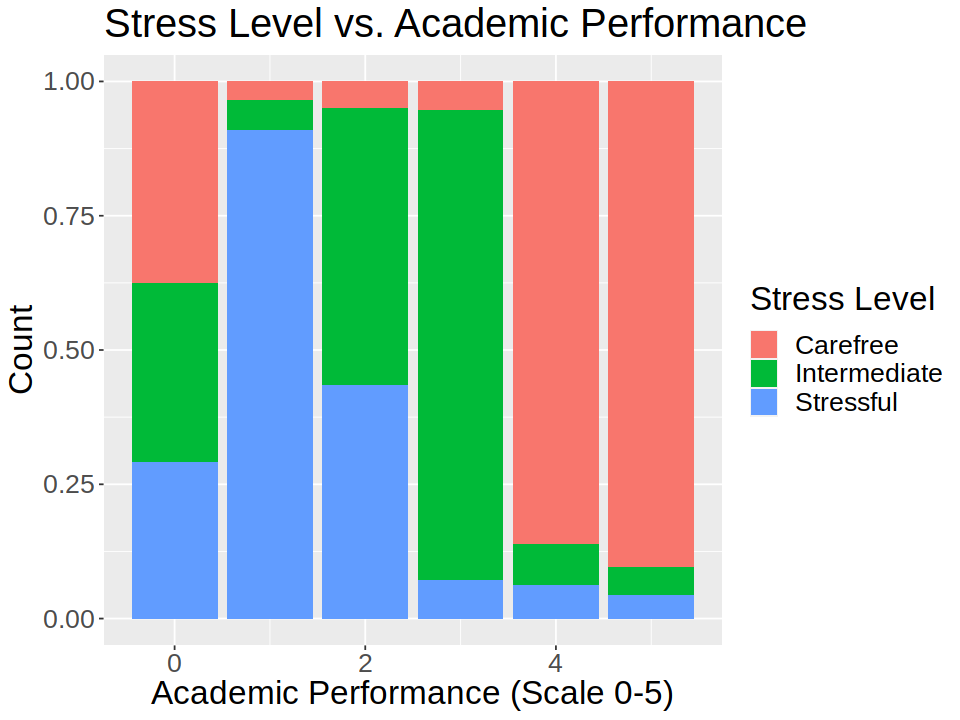

Warning message in geom_histogram(stat = "count", position = "fill"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


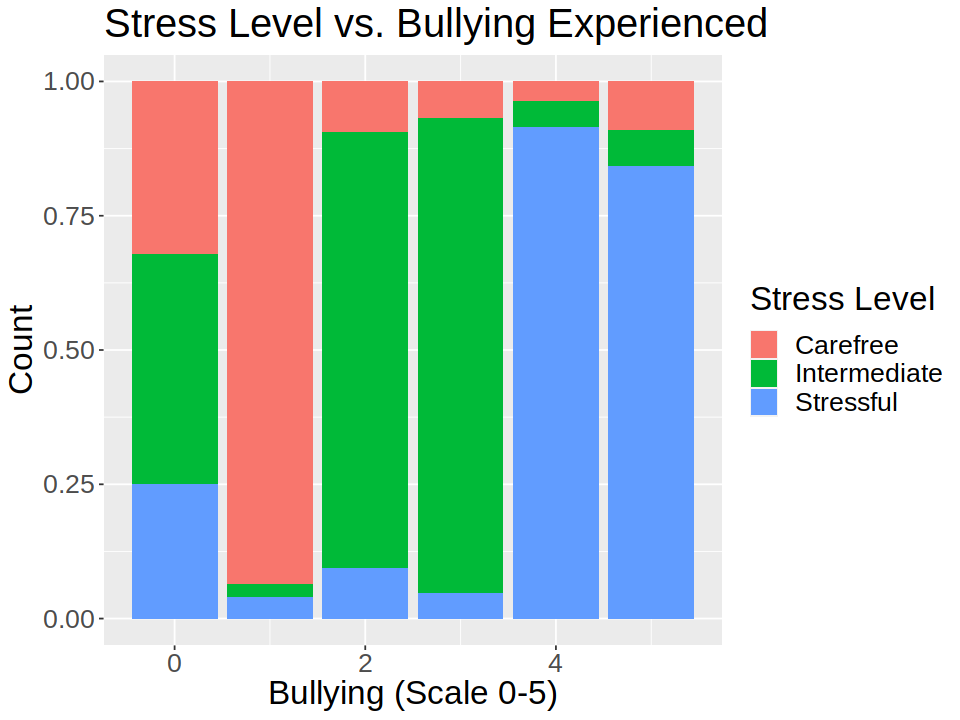

Warning message in geom_histogram(stat = "count", position = "fill"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


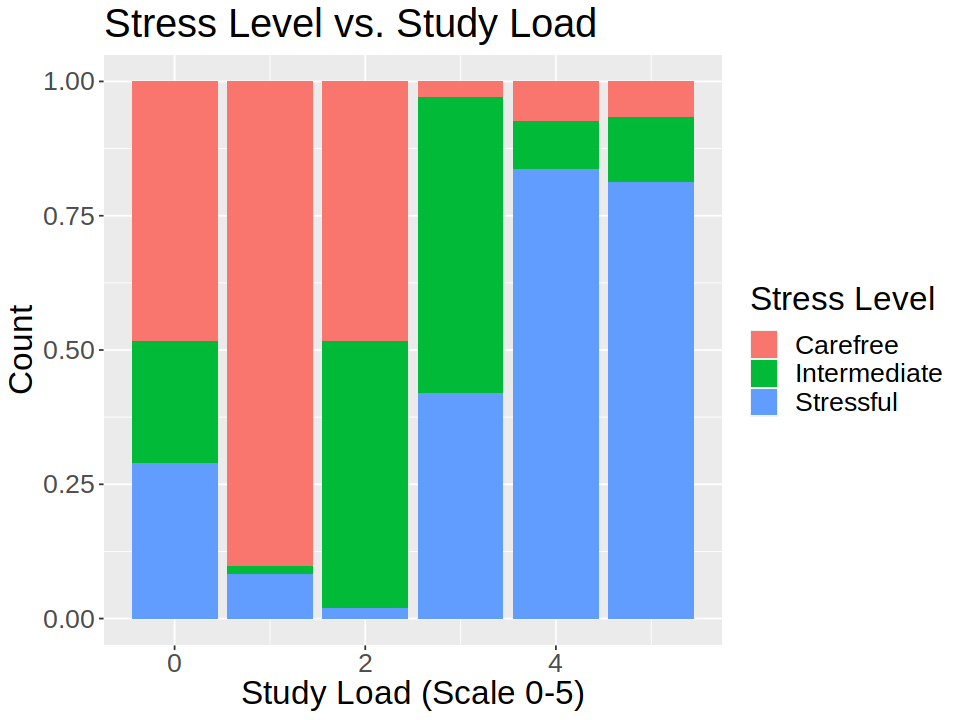

Warning message in geom_histogram(stat = "count", position = "fill"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


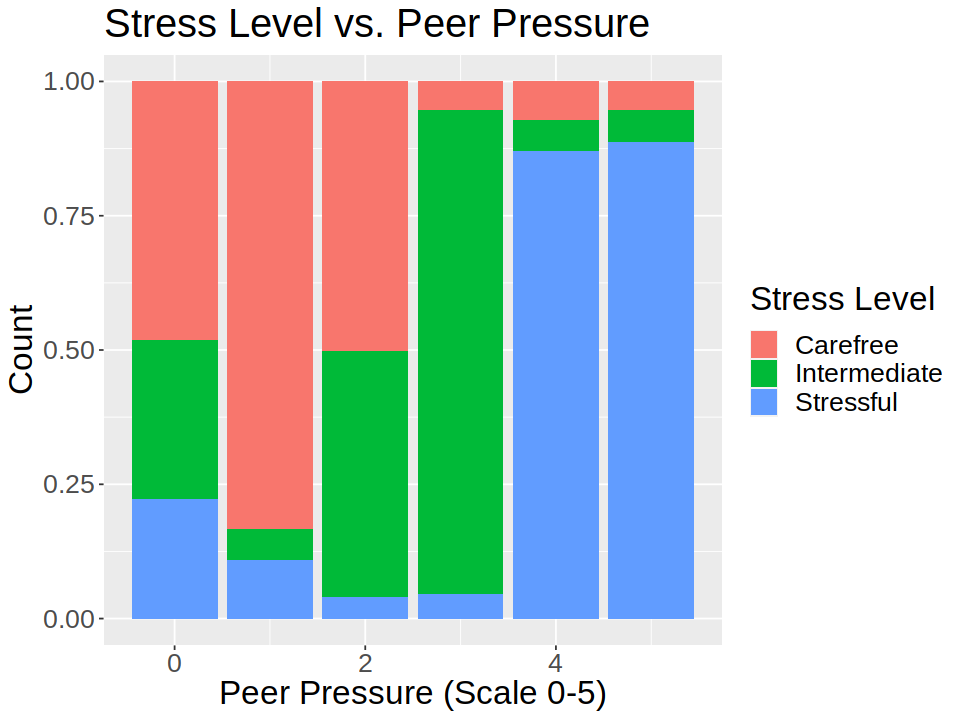

Warning message in geom_histogram(stat = "count", position = "fill"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


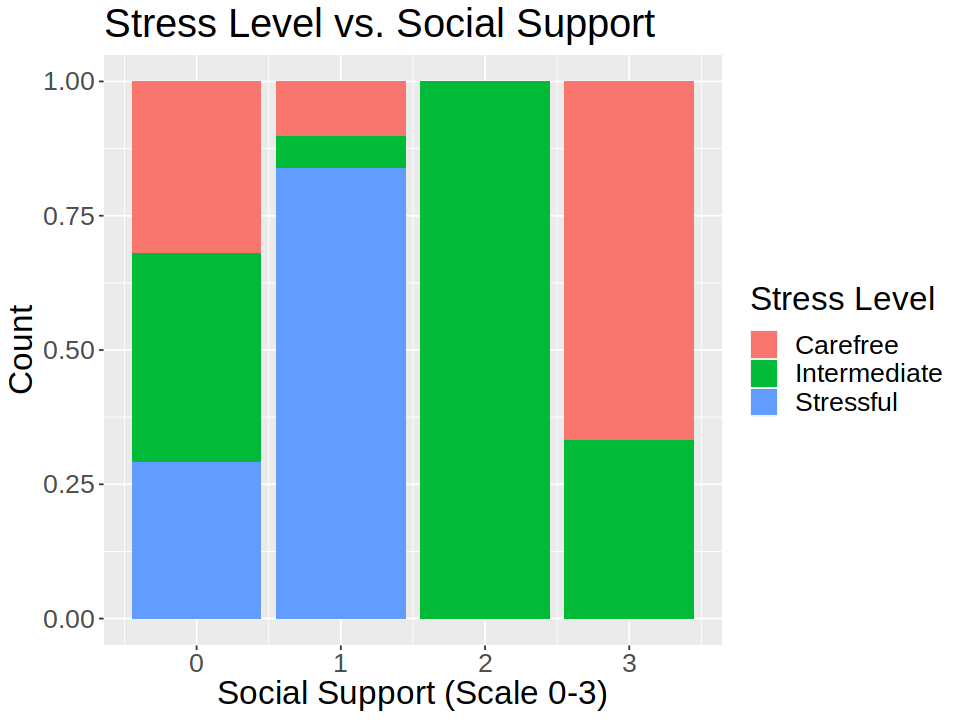

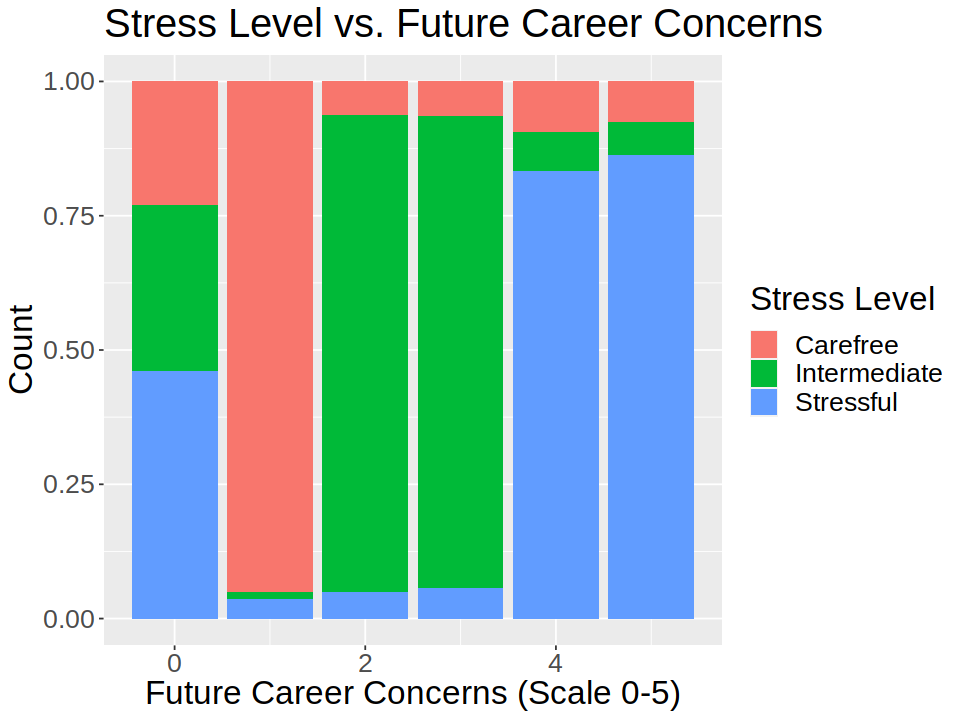

In [19]:
options(repr.plot.width = 8, repr.plot.height = 6)

stress_academic <- stress_training |>
ggplot(aes(x = academic_performance, fill = stress_level)) +
geom_histogram(stat = "count", position = "fill") +
labs(x = "Academic Performance (Scale 0-5)", y = "Count", fill = "Stress Level") +
ggtitle("Stress Level vs. Academic Performance") +
theme(text = element_text(size = 20))
stress_academic

stress_bullying <- stress_training |>
ggplot(aes(x = bullying, fill = stress_level)) +
geom_histogram(stat = "count", position = "fill") +
labs(x = "Bullying (Scale 0-5)", y = "Count", fill = "Stress Level") +
ggtitle("Stress Level vs. Bullying Experienced") +
theme(text = element_text(size = 20))
stress_bullying

stress_studyload <- stress_training |>
ggplot(aes(x = study_load, fill = stress_level)) +
geom_histogram(stat = "count", position = "fill") +
labs(x = "Study Load (Scale 0-5)", y = "Count", fill = "Stress Level") +
ggtitle("Stress Level vs. Study Load") +
theme(text = element_text(size = 20))
stress_studyload

stress_peerpressure <- stress_training |>
ggplot(aes(x = peer_pressure, fill = stress_level)) +
geom_histogram(stat = "count", position = "fill") +
labs(x = "Peer Pressure (Scale 0-5)", y = "Count", fill = "Stress Level") +
ggtitle("Stress Level vs. Peer Pressure") +
theme(text = element_text(size = 20)) 
stress_peerpressure

stress_socialsupport <- stress_training |>
ggplot(aes(x = social_support, fill = stress_level)) +
geom_histogram(stat = "count", position = "fill") +
labs(x = "Social Support (Scale 0-3)", y = "Count", fill = "Stress Level") +
ggtitle("Stress Level vs. Social Support") +
theme(text = element_text(size = 20))
stress_socialsupport

stress_future <- stress_training |>
ggplot(aes(x = future_career_concerns, fill = stress_level)) +
geom_histogram(stat = "count", position = "fill") +
labs(x = "Future Career Concerns (Scale 0-5)", y = "Count", fill = "Stress Level") +
ggtitle("Stress Level vs. Future Career Concerns") +
theme(text = element_text(size = 20))
stress_future

**METHODS**

In the previous visualization, we can see that each of the factors contributed to the level of stress. As an example, the higher the concern towards future career is, the higher the stress level tends to be. Each color represents the severity of stress, while the y-axis measures the percentage and x-axis scales the intensity of each variable.

We will choose 8 crucial stress level predictors from the original dataset: Academic performance, study load, teacher-student relationship, future career concerns, peer pressure, extracurricular activities, bullying, and social support. These factors were selected for their proven influence on student stress levels. Given our student-centric focus, we emphasize on academic and social factors. To visualize the results, we plan to utilize scatter plots, which can provide a clear representation of the relationships between individual predictors and stress levels. Additionally, we can use heatmaps to visualize the results. These can be particularly effective for displaying the strength and direction of correlations between multiple variables in a visually intuitive manner.

**EXPECTED OUTCOMES AND SIGNIFICANCE**

Understanding and addressing the root causes of stress among students is crucial for creating a supportive and conducive learning environment that promotes overall well-being. From this project, we expect to build a prediction model which could predict the stress level of a student given the intensity level of each variable that could be categorized as academic or social factor. This model will not only offer valuable insights into the individualized stress experiences of students but also provide a practical tool for educators and support systems to proactively intervene and provide tailored assistance. 

Furthermore, this project could lead to a host of intriguing future questions, such as: What specific interventions are most effective in reducing stress levels for students with different profiles? How can schools implement policies and practices that prioritize mental health and well-being alongside academic achievement? These questions present fertile ground for extended research and the development of strategies aimed at bolstering student well-being.

Data Set Source: "https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis/"